# Lab 3: Gesture Recognition using Convolutional Neural Networks

**Deadlines**: 

- Lab 3 Part A: Oct 15, 11:59pm
- Lab 3 Part B: Oct 22, 11:59pm

**Late Penalty**: There is a penalty-free grace period of one hour past the deadline. Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**Grading TAs**: 
- Lab 3 Part A: Geoff Donoghue  
- Lab 3 Part B: Geoff Donoghue

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins. 

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://drive.google.com/file/d/12umN5QUyvHQtwQuHBlS4Fx-2XutXLId3/view?usp=sharing

## Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

In [ ]:
# Importing libraries
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim #for gradient descent
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
) 

In [ ]:
# link to your Google Drive
from google.colab import drive
drive.mount('/content/drive')

folder_dir = '/content/drive/My Drive/APS360_Personal_folder/Labs/Lab_3b_Gesture_Dataset/' 


Mounted at /content/drive


In [ ]:
# Classify each student's images. E.g: Jack's images are under 'key=Jack' in the dictionary
def get_relevant_indices(dataset):
  """
  E.g: image_path = /content/drive/My Drive/APS360_Personal_folder/Labs/Lab_3b_Gesture_Dataset/A/100_A_1.jpg
  - Student id = '100', which indicates this is the image of 100th student
  - We are going to use it to classify each student's images
  """
  #get all images
  datas = dataset.imgs
  dic = {}

  for i in range(len(datas)):
    #get image path
    image_path = datas[i][0] 
    #separate out the file name
    temp = image_path.split('/')
    image_name = temp[-1].split('_')
    #get student id
    student_ID = image_name[0]

    #append the index of the image under the student ID
    if student_ID in dic.keys():
      dic[student_ID].append(i)
    else:
      dic[student_ID] = [i]

  return dic

# loading data 
def get_data_loader(batch_size=27, data_path=folder_dir):
  #Transform Settings - Do not use RandomResizedCrop
  transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])
  
  #load all images from the image folder
  raw_data = ImageFolder(data_path, transform=transform)
  #get relevant indices
  relevant_indices = get_relevant_indices(raw_data)
  #get all student IDs
  student_ID = list(relevant_indices.keys())
  #Split into train and validation
  np.random.seed(1000) #Fixed numpy random seed for reproducible shuffling
  np.random.shuffle(student_ID)
  #Training set: 80%, validation set: 10%, testing set: 10%
  split1 = int(len(student_ID) * 0.8) 
  split2 = int(len(student_ID) * 0.9)

  #split into training and validation indices
  train_ID, val_ID, testing_ID = student_ID[:split1], student_ID[split1:split2], student_ID[split2:]

  #data set used for sanity check 
  sanity_test_ID = student_ID[:4]
  #print(relevant_indices[train_ID[0]])

  #get indices of all image of students in training data set
  train_indices = []
  for x in train_ID:
    for y in relevant_indices[x]:
      train_indices.append(int(y))

  #get indices of all image of students in validation data set
  val_indices = []
  for x in val_ID:
    for y in relevant_indices[x]:
      val_indices.append(int(y))

  #get indices of all image of students in testing data set
  testing_indices = []
  for x in testing_ID:
    for y in relevant_indices[x]:
      testing_indices.append(int(y))

  #get indices of all image of students in sanity data set
  sanity_test_indices = []
  for x in sanity_test_ID:
    for y in relevant_indices[x]:
      sanity_test_indices.append(int(y))
      

  #get training loader
  train_sampler = SubsetRandomSampler(train_indices) #samples images randomly from the given indices
  train_loader = torch.utils.data.DataLoader(raw_data, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
  #get validation loader
  val_sampler = SubsetRandomSampler(val_indices)
  val_loader = torch.utils.data.DataLoader(raw_data, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
  #get testing loader
  testing_sampler = SubsetRandomSampler(testing_indices)
  testing_loader = torch.utils.data.DataLoader(raw_data, batch_size=batch_size,
                                              num_workers=1, sampler=testing_sampler)
  #get sanity loader
  sanity_sampler = SubsetRandomSampler(sanity_test_indices)
  sanity_loader = torch.utils.data.DataLoader(raw_data, batch_size=batch_size,
                                              num_workers=1, sampler=sanity_sampler)

  return train_loader, val_loader, testing_loader, sanity_loader

**Visualizing pre-processed datasets.**

Training data set: 72
Validation data set: 9
Testing data set: 10
Sanity test data set: 4


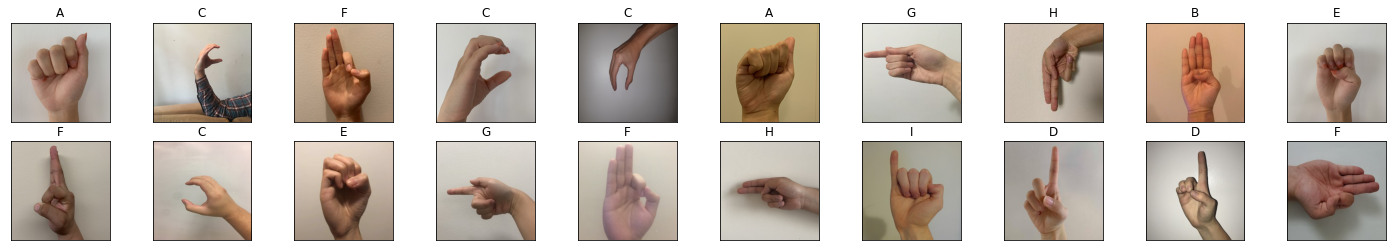

In [ ]:
# loading test data
train_loader, val_loader, testing_loader, sanity_loader = get_data_loader()

# Verification Step - obtain one batch of images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

# print the batch size for each dataset
print('Training data set:', len(train_loader))
print('Validation data set:', len(val_loader))
print('Testing data set:', len(testing_loader))
print('Sanity test data set:', len(sanity_loader))

### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        # number of hidden units for fully connected layers:
        hidden_units = 500
        self.name = "CNN"      
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 53 * 53, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 9)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Architecture: CNN


*   2 convolutional layers: because convolutional layer is better to extract features from a image. 
*   2 max pooling layers: because pooling layer can reduce unimportant information from the image and consolidate information. It also can help to reduce dimentionality so that the model is less computationally expensive. 
*   2 fully-connected layers: performing classification of these 9 types of images on "summarized images". 
*   Relu activation: it resolves vanishing gradients issues resulting from deep networks, and it's also computationally
more efficient
*   500 hidden units: since there are quite large number of outputs from convolutional layers (28090), 500 is chosen as a starting point for number if hidden units. 


 





### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [ ]:
#=================Helper functions=====================
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def get_model_name(name, batch_size, learn_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learn_rate,
                                                   epoch)
    return path

def evaluate(net, loader, criterion):
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        if use_cuda and torch.cuda.is_available():
            net = net.cuda()
            inputs = inputs.cuda()
            labels = labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        pred = outputs.max(1, keepdim=True)[1]
        total_err += pred.ne(labels.view_as(pred)).sum().item()
        total_loss += loss.item()
        total_epoch += len(labels)

    acc = float(total_err) / total_epoch
    loss = float(total_loss) / (i)
    return acc, loss

def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [ ]:
def train(model, train_loader, val_loader, batch_size=27, num_epochs=1, learn_rate = 0.001, use_cuda = True):

    torch.manual_seed(500)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    train_acc, val_acc = [], []
    # Set up some numpy arrays to store the training/validation loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    # training
    print ("Training Started...")
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            imgs, labels = data

            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            
            # Calculate the statistics
            pred = out.max(1, keepdim=True)[1]
            total_train_err += pred.ne(labels.view_as(pred)).sum().item()
            total_train_loss += loss.item()
            total_epoch += len(labels)

        # track accuracy
        train_acc.append(get_accuracy(model, train_loader))
        val_acc.append(get_accuracy(model, val_loader))
        print(epoch, train_acc[-1], val_acc[-1])

        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(model, val_loader, criterion)
 
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learn_rate, epoch)
        torch.save(model.state_dict(), model_path)
        # displaying the epochs performance
        print(("Epoch {}: Train err: {}, Train loss: {} |" +
               "Validation err: {}, Validation loss: {}").format(
            epoch + 1,
            train_err[epoch],
            train_loss[epoch],
            val_err[epoch],
            val_loss[epoch]))

    print('Finished Training')
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

Loss function: 

*   cross entropy loss function is chosen because this is a classification problem with 9 categories.

Optimizer: 

*   Adam Optimizer is chosen because it incorporates momentum, adaptive learning rate and stochastic gradient
descent. And it's also state of art. 






### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

Training Started...
0 0.11214953271028037 0.1125
1 0.1308411214953271 0.1125
2 0.1308411214953271 0.1125
3 0.35514018691588783 0.15416666666666667
4 0.6261682242990654 0.24166666666666667
5 0.6355140186915887 0.24583333333333332
6 0.7850467289719626 0.2833333333333333
7 0.8130841121495327 0.2625
8 0.7383177570093458 0.22916666666666666
9 0.7570093457943925 0.32083333333333336
10 0.8691588785046729 0.32916666666666666
11 0.9252336448598131 0.29583333333333334
12 0.9252336448598131 0.32083333333333336
13 0.9906542056074766 0.3458333333333333
14 1.0 0.36666666666666664
15 1.0 0.38333333333333336
16 1.0 0.3375
17 1.0 0.3416666666666667
18 1.0 0.3958333333333333
19 1.0 0.37083333333333335
20 1.0 0.37083333333333335
21 1.0 0.37083333333333335
22 1.0 0.37916666666666665
23 1.0 0.37916666666666665
24 1.0 0.37083333333333335
25 1.0 0.3625
26 1.0 0.35833333333333334
27 1.0 0.37083333333333335
28 1.0 0.375
29 1.0 0.38333333333333336
Finished Training


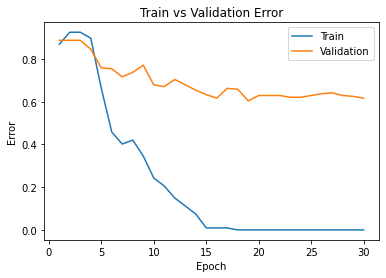

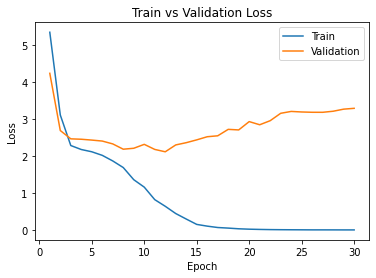

In [ ]:
# enable GPU
use_cuda = True
# initialize CNN
model = CNNClassifier()
if use_cuda and torch.cuda.is_available():
  model.cuda()

# hyperparameters
bs = 27
lr = 0.001
epochs = 30

# get sanity dataset
train_loader, val_loader, testing_loader, sanity_loader = get_data_loader()
# train sanity dataset
train(model, sanity_loader, val_loader, batch_size=bs, learn_rate=lr, num_epochs=epochs)

# plot curves
plot_path = get_model_name(model.name, batch_size=bs, learn_rate=lr, epoch=epochs - 1)
plot_training_curve(plot_path)

### 3. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

3 hyperparameters that are most worth tuning:
  
*   number of hidden units
*   learning rate
*   Batch size

In [ ]:
train_loader, val_loader, testing_loader, sanity_loader = get_data_loader()

### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        # number of hidden units for fully connected layers:
        hidden_units = 400
        self.name = "CNN"      
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 53 * 53, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 9)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# **1st setting:**
3 hyperparameters that are most worth tuning:
  
*   number of hidden units = 500
*   learning rate = 0.001
*   epoches = 20

Training Started...
0 0.6117463617463618 0.48333333333333334
1 0.7125779625779626 0.5666666666666667
2 0.7453222453222453 0.5916666666666667
3 0.8165280665280665 0.5958333333333333
4 0.8773388773388774 0.6166666666666667
5 0.9017671517671517 0.6375
6 0.9246361746361746 0.6583333333333333
7 0.9833679833679834 0.6375
8 0.9942827442827443 0.6458333333333334
9 0.989085239085239 0.6041666666666666
10 0.9792099792099792 0.6625
11 0.998960498960499 0.6541666666666667
12 0.9968814968814969 0.6458333333333334
13 0.9994802494802495 0.6458333333333334
14 1.0 0.6416666666666667
15 1.0 0.6458333333333334
16 1.0 0.6541666666666667
17 1.0 0.6458333333333334
18 1.0 0.6541666666666667
19 1.0 0.65
Finished Training


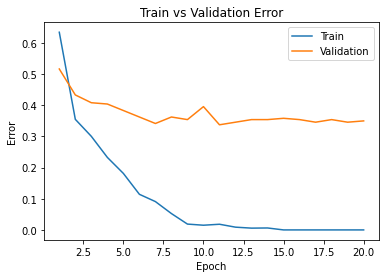

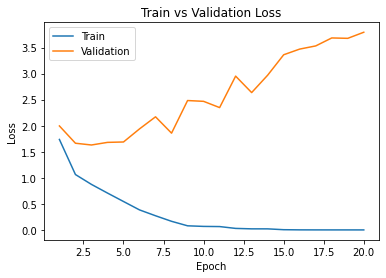

In [ ]:
# enable GPU
use_cuda = True
# initialize CNN
model = CNNClassifier()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  
# hyperparameters
lr = 0.001
epochs = 20
# train sanity dataset
train(model, train_loader, val_loader, learn_rate=lr, num_epochs=epochs)

# plot curves
plot_path = get_model_name(model.name, batch_size=27, learn_rate=lr, epoch=epochs - 1)
plot_training_curve(plot_path)

# **2nd setting:**
3 hyperparameters that are most worth tuning:
  
*   number of hidden units = 250
*   learning rate = 0.0015
*   epoches = 15

Training Started...
0 0.6746361746361746 0.5041666666666667
1 0.7920997920997921 0.5625
2 0.8108108108108109 0.5958333333333333
3 0.9256756756756757 0.6541666666666667
4 0.9802494802494802 0.6541666666666667
5 0.9916839916839917 0.6166666666666667
6 0.987006237006237 0.5916666666666667
7 0.9963617463617463 0.6333333333333333
8 1.0 0.6583333333333333
9 1.0 0.6375
10 1.0 0.6416666666666667
11 1.0 0.6416666666666667
12 1.0 0.6333333333333333
13 1.0 0.6333333333333333
14 1.0 0.6375
Finished Training


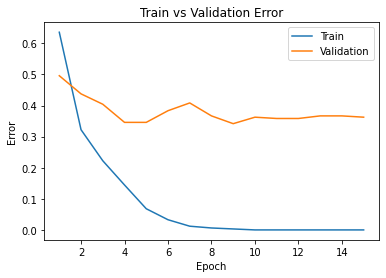

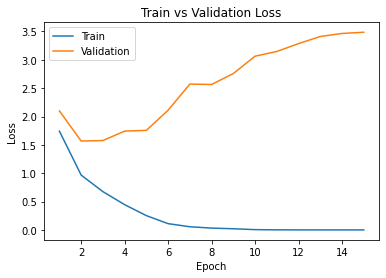

In [ ]:
# enable GPU
use_cuda = True
# initialize CNN
model = CNNClassifier()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  
# hyperparameters
lr = 0.0015
epochs = 15
# train sanity dataset
train(model, train_loader, val_loader, learn_rate=lr, num_epochs=epochs)

# plot curves
plot_path = get_model_name(model.name, batch_size=27, learn_rate=lr, epoch=epochs - 1)
plot_training_curve(plot_path)

# **3rd setting:**
3 hyperparameters that are most worth tuning:
  
*   number of hidden units = 500
*   learning rate = 0.00095555
*   epoches = 20

Training Started...
0 0.5426195426195426 0.4
1 0.7016632016632016 0.5375
2 0.722972972972973 0.5625
3 0.7848232848232848 0.5875
4 0.8497920997920998 0.6166666666666667
5 0.8134095634095634 0.5958333333333333
6 0.8861746361746362 0.6083333333333333
7 0.9677754677754677 0.6791666666666667
8 0.9579002079002079 0.6541666666666667
9 0.9698544698544699 0.6625
10 0.9896049896049897 0.6666666666666666
11 0.998960498960499 0.6625
12 0.998960498960499 0.6833333333333333
13 1.0 0.6666666666666666
14 1.0 0.6916666666666667
15 1.0 0.7
16 1.0 0.6875
17 1.0 0.6875
18 1.0 0.6958333333333333
19 1.0 0.6958333333333333
Finished Training


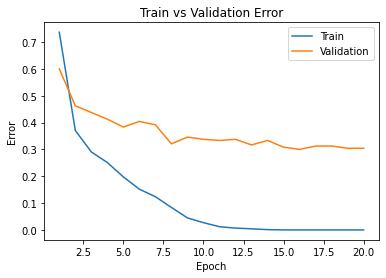

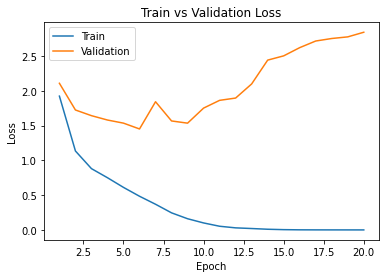

In [ ]:
# enable GPU
use_cuda = True
# initialize CNN
model = CNNClassifier()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  
# hyperparameters
lr = 0.00095555
epochs = 20
# train sanity dataset
train(model, train_loader, val_loader, learn_rate=lr, num_epochs=epochs)

# plot curves
plot_path = get_model_name(model.name, batch_size=27, learn_rate=lr, epoch=epochs - 1)
plot_training_curve(plot_path)

# **4th setting:**
3 hyperparameters that are most worth tuning:
  
*   number of hidden units = 400
*   learning rate = 0.00105
*   epoches = 50

In [ ]:
# enable GPU
use_cuda = True
# initialize CNN
model = CNNClassifier()
if use_cuda and torch.cuda.is_available():
  model.cuda()

# hyperparameters
lr = 0.00105
epochs = 50
# train sanity dataset
train(model, train_loader, val_loader, learn_rate=lr, num_epochs=epochs)

# plot curves
plot_path = get_model_name(model.name, batch_size=27, learn_rate=lr, epoch=epochs - 1)
plot_training_curve(plot_path)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

3 hyperparameters that are most worth tuning:
  
*   number of hidden units = 400
*   learning rate = 0.00105
*   epoches = 50
*   batch size = 27 (default)

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
test_err, test_loss = evaluate(model, testing_loader, nn.CrossEntropyLoss())
print('Test accuracy:', 1 - test_err)

Test accuracy: 0.8951310861423221


### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
#=====================transform images to tensors and save them in folders==============
folder_dir_template = '/content/drive/My Drive/APS360_Personal_folder/Labs/Lab3_dataset/{}/{}/{}.tensor'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

#load images to loader. Since we are transforming images to tensors, batch size should be 1
train_loader, val_loader, testing_loader, sanity_loader = get_data_loader(batch_size=1)

dataset_folder = ['Training_set', 'Validation_set', 'Testing_set']
data_loaders = {'Training_set': train_loader, 'Validation_set': val_loader, 'Testing_set': testing_loader}

#for each type of dataset, we transform each image and save it to my google drive with the path given above.
id = 0
for dataset_type in dataset_folder:
    for img, label in data_loaders[dataset_type]:
        #transform image to AlexNet.feature
        features = alexnet.features(img)
        #transform AlexNet.feature to tensor
        features_tensor = torch.from_numpy(features.detach().numpy())
        #create path of the tensor
        path = folder_dir_template.format(dataset_type, classes[label], str(id))
        #save tensor to the generated path
        torch.save(features_tensor.squeeze(0), path)
        id += 1

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
#Artifical Neural Network Architecture
class AlexNet_TFL(nn.Module):
    def __init__(self):
        super(AlexNet_TFL, self).__init__()
        self.name = "AlexNet_TFL"
        hidden_units = 200
        self.fc1 = nn.Linear(256 * 6 * 6, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 9)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Architecture choices:

*   Classifier: 2 fully-connected layers. Since AlexNet has already extracted features from images, we onln need to have a fully-connected layers as classifiers.
*   Relu activation: preventing gradient vanishing problem. 
*   Number of hidden units: 200. This is a stating point. 
*   List item



### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
# loader each type of dataset from dataset folders
def get_loader_TFL():
  folder_dir = '/content/drive/My Drive/APS360_Personal_folder/Labs/Lab3_dataset/{}'
  dataset_type = ['Training_set', 'Validation_set', 'Testing_set']
  data_loaders = {}

  #get dataset loaders from each type of datset
  for dataset_type in dataset_type:
      #generate each folder's path
      path = folder_dir.format(dataset_type)
      #load dataset from dataset folder
      dataset = torchvision.datasets.DatasetFolder(path, loader=torch.load, extensions=('.tensor'))
      #create loader from the dataset
      data_loader = torch.utils.data.DataLoader(dataset, batch_size=27, shuffle=True)
      data_loaders[dataset_type] = data_loader

  return data_loaders['Training_set'], data_loaders['Validation_set'], data_loaders['Testing_set']

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [ ]:
# get loaders
train_loader, validation_loader, testing_loader = get_loader_TFL()

# enable GPU
use_cuda = True
# initialize CNN
model = AlexNet_TFL()
if use_cuda and torch.cuda.is_available():
  model.cuda()

#hyperparameters:
lr = 0.000275
epochs = 20

#train model
train(model, train_loader, validation_loader, learn_rate=lr, num_epochs=epochs)

# plot curves
plot_path = get_model_name(model.name, batch_size=27, learn_rate=lr, epoch=epochs - 1)
plot_training_curve(plot_path)

### 5. Additional Testing [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?